In [35]:
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedLineDocument
from gensim.models import doc2vec
from gensim.models import Doc2Vec
from gensim import models
from sklearn.cluster import KMeans

In [36]:
# dictionary of title_Id -> title_name
fp=open("title_Id.txt",'r')

titleId_titleName={}
for line in fp:
    line=line.strip().split('#')
    #print line[0], line[1]
    if len(line)!=2:
        if len(line)>2:
            key=line[-1]
            value=""
            for i in range(len(line)-1):
                value=value+line[i]
            titleId_titleName[key]=value 
    else:
        titleId_titleName[line[1]]=line[0]

fp.close()

In [37]:
# dictionary of journal_Id -> journal_name
fp=open("journal_Id.txt",'r')

journalId_JournalName={}
for line in fp:
    line=line.strip().split("#")
    journalId_JournalName[line[1]]=line[0]

fp.close()

In [38]:
# dictionary of author_Id -> author_name
fp= open("author_Id.txt",'r')

authorId_authorName={}
for line in fp:
    line = line.strip().split("#")
    authorId_authorName[line[1]]=line[0]
fp.close()

In [39]:
fp= open("title_Journal_Author.txt",'r')

authorList=[]
titleJournalList=[]
for line in fp:
    line = line.strip().split("#")
    curr= titleId_titleName[line[0]] + " " + journalId_JournalName[line[1]]
    titleJournalList.append(curr)
    tempList=line[2].strip().split('|') #author ids list
    tempNameList=[] #authors namelist
    for i in tempList:
        tempNameList.append(authorId_authorName[i])
    authorList.append(tempNameList)
    
fp.close()

In [40]:
counter=1
sentences = []
for line in titleJournalList:
    line=line.strip()
    sentences.append(doc2vec.LabeledSentence(words=line.split(' '),tags=[str(counter)]))
    counter+=1

In [41]:
# for i in sentences:
#     print i

In [42]:
class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])

In [43]:
model = models.Doc2Vec(alpha=.025, min_alpha=.025, min_count=1)
model.build_vocab(sentences)

In [44]:
for epoch in range(10):
    model.train(sentences)
    model.alpha -= 0.002  # decrease the learning rate`
    model.min_alpha = model.alpha  # fix the learning rate, no decay

In [45]:
model.save("my_model.doc2vec")
model_loaded = models.Doc2Vec.load('my_model.doc2vec')

In [46]:
textVect = model_loaded.docvecs.doctag_syn0

In [47]:
## K-means ##
num_clusters = 20
km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)
km.fit(textVect)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
clusters = km.labels_.tolist()
print(len(clusters))
#print clusters

144686


In [18]:
authorClusters={} # Cluster Id to List of authorName
for i in range(len(titleJournalList)):
    currList=[]

    
    clusterId=clusters[i]
    
    curAuthorsList=authorList[i] #authors list for current article
    if clusterId in authorClusters.keys():
        #fetch the existing list of authors for the clusterId
        tempList=authorClusters[clusterId]
        for j in curAuthorsList:
            tempList.append(j)
            
        #update authorsClusters with updated authors list
        authorClusters[clusterId]=tempList
        
    else: #create a new key with the new cluster id and make value list of authors for the current article
        authorClusters[clusterId]=curAuthorsList

# print clusters Id-> author ids



In [19]:
fp=open("Kmeans_Doc2vec_output","wr")

for i in authorClusters.keys():
    outstr=str(i) + " => " + str(authorClusters[i])
    fp.write(outstr+"\n")
    fp.write("**************************************************************************************************************************"+"\n")
fp.close()

In [50]:
%matplotlib inline

In [51]:
print (len(titleJournalList))

144686


In [52]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [53]:
range_n_clusters = [10,20,50,70,100,130,150,170,200]

In [54]:
valueList=[]

In [58]:
valueList_5000=[]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(textVect)
    silhouette_avg = silhouette_score(textVect, cluster_labels, metric='euclidean',sample_size=5000)
    valueList_5000.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :",- silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.00734883
For n_clusters = 20 The average silhouette_score is : 0.0305645
For n_clusters = 50 The average silhouette_score is : 0.0444275
For n_clusters = 70 The average silhouette_score is : 0.063843
For n_clusters = 100 The average silhouette_score is : 0.0742511
For n_clusters = 130 The average silhouette_score is : 0.0762771
For n_clusters = 150 The average silhouette_score is : 0.0853631
For n_clusters = 170 The average silhouette_score is : 0.0758329
For n_clusters = 200 The average silhouette_score is : 0.0797882


In [57]:
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(textVect)
    silhouette_avg = silhouette_score(textVect, cluster_labels, metric='euclidean',sample_size=10000)
    valueList.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :",- silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.00804543
For n_clusters = 20 The average silhouette_score is : 0.0308399
For n_clusters = 50 The average silhouette_score is : 0.0485235
For n_clusters = 70 The average silhouette_score is : 0.0672753
For n_clusters = 100 The average silhouette_score is : 0.074809
For n_clusters = 130 The average silhouette_score is : 0.0784348
For n_clusters = 150 The average silhouette_score is : 0.0764167
For n_clusters = 170 The average silhouette_score is : 0.081752
For n_clusters = 200 The average silhouette_score is : 0.078674


In [56]:
valueList_15000=[]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(textVect)
    silhouette_avg = silhouette_score(textVect, cluster_labels, metric='euclidean',sample_size=15000)
    valueList_15000.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :",- silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.00904671
For n_clusters = 20 The average silhouette_score is : 0.0327203
For n_clusters = 50 The average silhouette_score is : 0.0486096
For n_clusters = 70 The average silhouette_score is : 0.0641635
For n_clusters = 100 The average silhouette_score is : 0.0745548
For n_clusters = 130 The average silhouette_score is : 0.0757974
For n_clusters = 150 The average silhouette_score is : 0.0754469
For n_clusters = 170 The average silhouette_score is : 0.0808563
For n_clusters = 200 The average silhouette_score is : 0.0794628


In [67]:
score_5000=[]
score_10000=[]
score_15000=[]

for i in valueList_5000:
    score_5000.append(-i)

for i in valueList:
    score_10000.append(-i)

for i in valueList_15000:
    score_15000.append(-i)


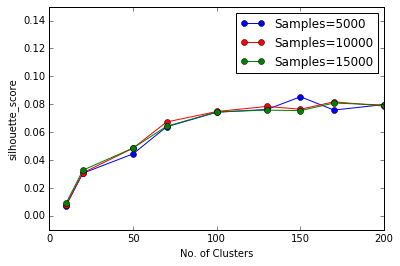

In [71]:
import matplotlib.pyplot as plt

plt.axis([0,200,-0.01,0.15])
plt.xlabel('No. of Clusters')
plt.ylabel('silhouette_score')

plt.plot(range_n_clusters,score_5000,color='b',marker='o',label='Samples=5000')
plt.plot(range_n_clusters,score_10000,color='r',marker='o',label='Samples=10000')
plt.plot(range_n_clusters,score_15000,color='g',marker='o',label='Samples=15000')

plt.legend()
plt.show()